In [22]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [23]:
from ML.Model import Predicter
from PreProcessing.DataManipulation import DataManipulation
import pickle

In [24]:
data = pd.read_csv("../data/deep-scenario.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Execution                      33530 non-null  int64  
 1   ScenarioID                     33530 non-null  object 
 2   Configuration_API_Description  33530 non-null  object 
 3   Attribute[TTC]                 33530 non-null  float64
 4   Attribute[DTO]                 33530 non-null  float64
 5   Attribute[Jerk]                33530 non-null  float64
 6   Attribute[COL]                 33530 non-null  bool   
 7   Attribute[COLT]                33530 non-null  object 
 8   Attribute[SAC]                 33530 non-null  float64
 9   reward                         33530 non-null  object 
 10  road                           33530 non-null  object 
 11  strategy                       33530 non-null  object 
 12  scenario                       33530 non-null 

## Pre Processing

In [25]:
dm = DataManipulation("../data/deep-scenario.csv")
dm.data.head(5)

,Execution,ScenarioID,Configuration_API_Description,Attribute[TTC],Attribute[DTO],Attribute[Jerk],Attribute[COL],Attribute[COLT],Attribute[SAC],reward,road,strategy,scenario
0,0,0_scenario_0,A red BoxTruck is overtaking (near) the ego ve...,100000.000000,24.810964,3.48,False,None,0.0,dto,road1,greedy,rain_day
1,0,0_scenario_1,A skyblue SUV is driving from the opposite dir...,100000.000000,8.654072,1.04,False,None,0.0,dto,road1,greedy,rain_day
2,0,0_scenario_2,A skyblue BoxTruck is driving ahead (near) of ...,2.103269,10.209357,4.98,False,None,0.0,dto,road1,greedy,rain_day
3,0,0_scenario_3,A black SchoolBus is driving ahead (near) of t...,7.452645,17.011425,2.42,False,None,0.0,dto,road1,greedy,rain_day
4,0,0_scenario_4,A red Hatchback is crossing the road (far) and...,2.885993,27.858975,2.84,False,None,0.0,dto,road1,greedy,rain_day


In [26]:
dm.addFromXML("../data/dataFromXML.csv")
dm.data.head(5)

[268, 273, 477, 1406, 1662, 1961, 2000, 2001, 2002, 2091, 2789, 3271, 4025, 4089, 4301, 4474, 4663, 5318, 5374, 5624, 5656, 6024, 6399, 6445, 6540, 6854, 7140, 7406, 7994, 9058, 9231, 9261, 10156, 10422, 10561, 10572, 10588, 11359, 11624, 11719, 11897, 12175, 12180, 12961, 13222, 13299, 13814, 14475, 14503, 14984, 15244, 17619, 19450, 19637, 20403, 20492, 20957, 20960, 21122, 21625, 21964, 22051, 23017, 23804, 24649, 25148, 25247, 25336, 25489, 25502, 25749, 25826, 26875, 26879, 26908, 26953, 26957, 27058, 27074, 27092, 27103, 27138, 27185, 27224, 27341, 27357, 27365, 27367, 27457, 27595, 27601, 27625, 27637, 27686, 27688, 27739, 27786, 27852, 27913, 27972, 27980, 28053, 28105, 28121, 28183, 28315, 28335, 28348, 28356, 28363, 28460, 28465, 28471, 28473, 28490, 28504, 28572, 28574, 28579, 28597, 28601, 28622, 28624, 28684, 28693, 28709, 28727, 28733, 28749, 28762, 28841, 28866, 28920, 28928, 28996, 29046, 29087, 29091, 29170, 29190, 29212, 29228, 29235, 29372, 29393, 29418, 29474, 29568

,Execution,ScenarioID,Configuration_API_Description,Attribute[TTC],Attribute[DTO],Attribute[Jerk],Attribute[COL],Attribute[COLT],Attribute[SAC],reward,...,av3z,av4x,av4y,av4z,av5x,av5y,av5z,av6x,av6y,av6z
0,0,0_scenario_0,A red BoxTruck is overtaking (near) the ego ve...,100000.000000,24.810964,3.48,False,None,0.0,dto,...,0.0,-0.001,-0.002,0.0,0.003,-0.002,0.0,-0.000,-0.001,0.0
1,0,0_scenario_1,A skyblue SUV is driving from the opposite dir...,100000.000000,8.654072,1.04,False,None,0.0,dto,...,-0.0,-0.000,-0.000,0.0,0.001,-0.001,0.0,0.000,-0.002,0.0
2,0,0_scenario_2,A skyblue BoxTruck is driving ahead (near) of ...,2.103269,10.209357,4.98,False,None,0.0,dto,...,0.0,0.006,-0.003,0.0,0.012,-0.002,0.0,0.003,-0.001,-0.0
3,0,0_scenario_3,A black SchoolBus is driving ahead (near) of t...,7.452645,17.011425,2.42,False,None,0.0,dto,...,0.0,0.000,-0.000,0.0,0.000,-0.000,0.0,-0.001,-0.000,0.0
4,0,0_scenario_4,A red Hatchback is crossing the road (far) and...,2.885993,27.858975,2.84,False,None,0.0,dto,...,0.0,-0.007,-0.000,-0.0,0.005,0.001,0.0,0.004,0.002,-0.0


---

In [27]:
ids = [268, 273, 477, 1406, 1662, 1961, 2000, 2001, 2002, 2091]
cols = ["Attribute[DTO]", "speed1", "speed2", "speed3", "speed4", "speed5", "speed6", "Attribute[SAC]"]
# dm.data.loc[dm.data["Attribute[COL]"] == True][["Attribute[DTO]", "speed1", "speed2", "speed3", "speed4", "speed5", "speed6", "Attribute[SAC]"]]
dm.data.iloc[ids][cols]

,Attribute[DTO],speed1,speed2,speed3,speed4,speed5,speed6,Attribute[SAC]
268,1.295431,2.623626,3.582205,3.469742,2.785889,3.443,4.764,4.442793
273,1.331153,1.536797,1.481917,1.723328,1.945000,3.981,5.591,2.346909
477,1.411721,1.735009,0.914792,1.804000,2.700000,3.077,4.397,2.378859
1406,4.095299,2.743850,3.850416,3.298107,3.749705,3.705,4.302,3.715036
1662,1.378684,1.628659,2.188346,2.626000,3.734000,5.172,5.616,3.522738
1961,1.473800,5.087671,4.348258,5.423379,5.005000,6.832,6.982,5.225631
2000,50.289233,0.082000,1.422000,2.504000,0.007000,0.003,0.001,1.340647
2001,25.204523,0.135000,1.481000,2.582000,0.003000,0.002,0.005,0.217742
2002,27.160148,0.135000,1.557000,2.778000,0.003000,0.005,0.004,0.344920
2091,1.511598,3.467284,2.311596,3.271000,4.587000,6.061,7.418,3.923682


---

In [28]:
# newdtos = dm.data.loc[dm.data["Attribute[COL]"] == True, "Attribute[DTO]"].apply(lambda x: x+1.5)
# dm.data.loc[dm.data["Attribute[COL]"] == True, "Attribute[DTO]"] = newdtos

In [29]:
dm.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33530 entries, 0 to 33529
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Execution                      33530 non-null  int64  
 1   ScenarioID                     33530 non-null  object 
 2   Configuration_API_Description  33530 non-null  object 
 3   Attribute[TTC]                 33530 non-null  float64
 4   Attribute[DTO]                 33530 non-null  float64
 5   Attribute[Jerk]                33530 non-null  float64
 6   Attribute[COL]                 33530 non-null  bool   
 7   Attribute[COLT]                33530 non-null  object 
 8   Attribute[SAC]                 33530 non-null  float64
 9   reward                         33530 non-null  object 
 10  road                           33530 non-null  object 
 11  strategy                       33530 non-null  object 
 12  scenario                       33530 non-null 

In [30]:
dm.data.loc[dm.data["Attribute[COL]"] == True].value_counts(["Attribute[TTC]", "Attribute[COL]"])

Attribute[TTC]  Attribute[COL]
0.0             True              1050
dtype: int64

C:\Users\Yohannes\AppData\Local\Temp/ipykernel_43968/4175488753.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dm.data.corr()["Attribute[COL]"].plot(kind="bar")


<AxesSubplot:>

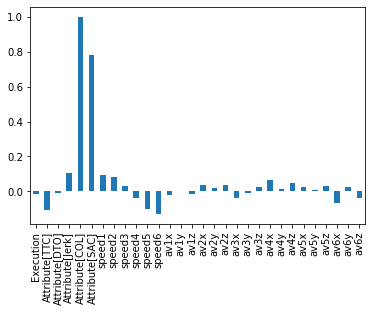

In [31]:
dm.data.corr()["Attribute[COL]"].plot(kind="bar")

In [32]:
dm.data.groupby(['strategy', 'Attribute[COL]']).size().unstack()

Attribute[COL],False,True
strategy,,
greedy,13070,192
random,13407,158
rl_based,6003,700


In [33]:
dm.data.value_counts("Attribute[COL]")

Attribute[COL]
False    32480
True      1050
dtype: int64

In [34]:
#  our data is very unbalanced, we need to balance it
# we can do this by undersampling the majority class
dm.underSample(1000)
dm.data.value_counts("Attribute[COL]")

Attribute[COL]
True     1050
False    1000
dtype: int64

## Model

In [35]:
trainX, trainY, testX, testY = dm.splitTrainTest()
print(f"trainX:{trainX.shape}, trainY:{trainY.shape}, testX:{testX.shape}, testY:{testY.shape}")

splitting at 1640.
trainX:(1640, 30), trainY:(1640, 4), testX:(410, 30), testY:(410, 4)


In [36]:
trainX.head()

,Attribute[DTO],Attribute[Jerk],reward,road,strategy,scenario,speed1,speed2,speed3,speed4,...,av3z,av4x,av4y,av4z,av5x,av5y,av5z,av6x,av6y,av6z
23564,3.457896,3.34,ttc,road2,random,rain_day,1.947,1.669,1.431,1.762,...,0.000,0.008,-0.002,-0.004,-0.001,-0.001,0.000,-0.000,-0.001,0.000
7302,2.754211,7.38,jerk,road3,greedy,rain_night,6.045,6.931,8.139,8.292,...,-0.004,0.000,-0.000,0.001,0.004,-0.000,0.006,-0.004,0.006,-0.004
15336,13.717145,6.18,dto,road2,random,sunny_night,7.408,6.340,6.431,6.285,...,0.001,0.001,-0.004,0.001,-0.001,0.002,-0.002,0.001,0.001,0.001
4796,34.844866,7.50,jerk,road1,greedy,rain_night,7.924,8.563,7.442,6.322,...,-0.002,0.004,-0.029,-0.001,0.004,-0.001,-0.003,0.008,-0.003,-0.005
3810,17.077699,6.40,dto,road4,greedy,rain_night,1.494,1.188,0.952,1.480,...,-0.000,-0.003,-0.000,-0.003,0.001,-0.000,0.001,0.000,-0.001,0.000


In [37]:
model = Predicter()
x, y = model.preProcess(trainX, trainY) # some last preprocessing (scaling and label encoding)
testX, testY = model.preProcess(testX, testY)

model.fit(x, y)

Scaler is fitted


c:\Users\Yohannes\anaconda3\envs\MasterThesis\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
# print sample of x, y, testX, testY
print(f"x:{x[:2]},\n\ny:{y[:5]},\n\ntestX:{testX[:2]},\n\ntestY:{testY[:5]}")

x:[[-0.59802934 -0.82211812 -1.20182623 -1.29363928 -1.25625566 -0.93159164
  -0.83279541 -0.77222067  0.04053802  0.04734335  0.02753767 -0.02945252
   0.00151543 -0.02662018  0.03132504  0.05632397 -0.02292548  0.10480931
   0.03543296 -0.09062776 -0.05147272  0.03691887 -0.03809269  0.05525837
   0.01757318  0.03350253]
 [-0.67582147  0.34630016 -0.06564053  0.22649326  0.7401182   0.90888638
   0.78787287  0.47690401 -0.67948738  0.09633725 -0.84939022 -0.0770291
   0.00569241 -0.10460248 -0.03580005  0.06125649 -0.12758182 -0.0410897
   0.0492984   0.00408899  0.06499425  0.04419528  0.08858256 -0.08278234
   0.06964857 -0.07465525]],

y:[0 0 0 0 0],

testX:[[-0.87835783  1.90804737  2.85273202  2.60982534 -0.50210966 -1.06293357
  -0.67898906 -0.16118528  0.52055494  0.26781592 -0.1916943  -0.52900666
   1.58041295 -0.67647269 -3.50392996 -0.11631425  0.3433717   0.23247094
   0.09782743  0.0798624   0.32122156  0.0951301   0.02524493 -1.70476069
  -0.3023185  -1.72406138]
 [-0.1

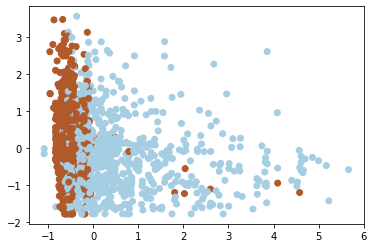

In [39]:
# plot scatter of x and y
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.Paired)

In [40]:
pred = model.predict(testX)
score = model.getScore(pred, testY)

Total: 410, number of collisions: 221
	TN: 176 	| FP: 13 
	FN: 25 	| TP: 196
Accuracy: 0.91
Precision: 0.94
Recall: 0.89
F1: 0.91


In [41]:
# model_score = TN-FP-FN-TP
model_score = f"{score[0][0]}-{score[0][1]}-{score[1][0]}-{score[1][1]}"
model.saveModel("MLPClassifier", accuracy=model_score)

Model saved!


## Paramter Tuning

https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

In [34]:
curr_params = model.model.get_params()

# loop through all the parameters and change each value to a list of the value
curr_params = dict((key, [value]) for (key, value) in curr_params.items())
curr_params.update({
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
})
curr_params

{'activation': ['tanh', 'relu'],
 'alpha': [0.0001, 0.05],
 'batch_size': ['auto'],
 'beta_1': [0.9],
 'beta_2': [0.999],
 'early_stopping': [False],
 'epsilon': [1e-08],
 'hidden_layer_sizes': [(10, 30, 10), (20,)],
 'learning_rate': ['constant', 'adaptive'],
 'learning_rate_init': [0.001],
 'max_fun': [15000],
 'max_iter': [200],
 'momentum': [0.9],
 'n_iter_no_change': [10],
 'nesterovs_momentum': [True],
 'power_t': [0.5],
 'random_state': [None],
 'shuffle': [True],
 'solver': ['sgd', 'adam'],
 'tol': [0.0001],
 'validation_fraction': [0.1],
 'verbose': [False],
 'warm_start': [False]}

In [35]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model.model, curr_params, n_jobs=-1, cv=5)
clf.fit(x, y)

c:\Users\Yohannes\anaconda3\envs\MasterThesis\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05], 'batch_size': ['auto'],
                         'beta_1': [0.9], 'beta_2': [0.999],
                         'early_stopping': [False], 'epsilon': [1e-08],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001], 'max_fun': [15000],
                         'max_iter': [200], 'momentum': [0.9],
                         'n_iter_no_change': [10], 'nesterovs_momentum': [True],
                         'power_t': [0.5], 'random_state': [None],
                         'shuffle': [True], 'solver': ['sgd', 'adam'],
                         'tol': [0.0001], 'validation_fraction': [0.1],
                         'verbose': [False], 'warm_start': [False]})

In [36]:
clf.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (20,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [22]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.949 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
0.956 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 

In [26]:
y_true, y_pred = testY, clf.predict(testX)
from sklearn.metrics import classification_report, confusion_matrix
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1978
           1       0.90      0.71      0.80       232

    accuracy                           0.96      2210
   macro avg       0.93      0.85      0.89      2210
weighted avg       0.96      0.96      0.96      2210



In [27]:
score = clf.score(testX, testY)
score

0.9615384615384616

In [28]:
confusion_matrix(y_true, y_pred)

array([[1960,   18],
       [  67,  165]], dtype=int64)

Need to analyse, best params and default params are the same, why?